In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
path = '/media/winter/vm/github/mlcourse/data/'

In [6]:
telecom = pd.read_csv(path + "telecom_churn.csv")

In [10]:
# for particular display number of  cols and rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print(telecom.shape)

# churn - goal feature
telecom.head()

(3333, 20)


State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [11]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [13]:
telecom['Churn'] = telecom['Churn'].astype('int64')
type(telecom['Churn'][0])

numpy.int64

In [14]:
telecom.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [21]:
print(telecom.describe(include=['object']))
# print(telecom.describe(include=['bool'])) # Churn was bool now int64

       State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411


In [22]:
telecom['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [24]:
print(telecom['Area code'].value_counts()) 
print(telecom['Area code'].value_counts(normalize=True)) # normalize freq to relative

415    1655
510     840
408     838
Name: Area code, dtype: int64
415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64


In [25]:
telecom.sort_values(by='Total day charge', ascending=False).head()

State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   

      Customer service calls  Churn  
365                        1      1  
985                        1      1  
2594                       1      1  
156                        0      1  
605                        2      1

In [27]:
telecom.sort_values(by=['Total day charge', 'Churn'], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
1345    SD              98        415                 No              No   
1397    VT             101        510                 No              No   
2736    OK             127        510                 No             Yes   
2753    OH             134        415                 No              No   
1986    WI              70        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
1345                      0                0.0                0   
1397                      0                0.0                0   
2736                     27                2.6              113   
2753                      0                7.8               86   
1986                      0                7.9              100   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
1345              0.00              159.6              130             13.57   
1397              0.00              192.1              119             16.33   
2736              0.44              254.0              102             21.59   
2753              1.33              171.4              100             14.57   
1986              1.34              136.4               83             11.59   

      Total night minutes  Total night calls  Total night charge  \
1345                167.1                 88                7.52   
1397                168.8                 95                7.60   
2736                242.7                156               10.92   
2753                186.5                 80                8.39   
1986                156.6                 89                7.05   

      Total intl minutes  Total intl calls  Total intl charge  \
1345                 6.8                 1               1.84   
1397                 7.2                 4               1.94   
2736                 9.2                 5               2.48   
2753                12.9                 2               3.48   
1986                12.1                 1               3.27   

      Customer service calls  Churn  
1345                       4      1  
1397                       1      0  
2736                       3      0  
2753                       2      0  
1986                       0      0

In [28]:
telecom['Churn'].mean()

0.14491449144914492

In [29]:
telecom[telecom['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [30]:
telecom[telecom['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

In [31]:
telecom[(telecom['Churn'] == 0) & (telecom['International plan'] == 'No')]['Total intl minutes'].max()

18.9

In [34]:
# df.loc - by name
# df.iloc - by index
print(telecom.iloc[0:5, 0:3])
telecom.loc[0:5, 'State':'Area code']

  State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415


State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [42]:
# telecom[:1] # first row
telecom[-1:] #last row

State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0

In [48]:
telecom.apply(np.max) # axis=1 for rows

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [49]:
# replace No, Yes to False,True
d = {'No': False, 'Yes':True}
telecom['International plan'] = telecom['International plan'].map(d)
telecom.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [50]:
# same as
telecom = telecom.replace({'Voice mail plan': d})
telecom.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [51]:
# telecom.groupby(by=grouping_columns)[column_to_show].function()

columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
telecom.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

In [52]:
# Using agg (aggregate) function
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

telecom.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [53]:
# cross tabs
pd.crosstab(telecom['Churn'], telecom['International plan'])

International plan  False  True 
Churn                           
0                    2664    186
1                     346    137

In [54]:
pd.crosstab(telecom['Churn'], telecom['Voice mail plan'], normalize=True)

Voice mail plan     False     True 
Churn                              
0                0.602460  0.252625
1                0.120912  0.024002

In [56]:
telecom.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'],
                   aggfunc='mean').head()

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

In [58]:
total_calls = telecom['Total day calls'] + telecom['Total eve calls'] + \
                  telecom['Total night calls'] + telecom['Total intl calls']
telecom.insert(loc=len(telecom.columns), column='Total calls', value=total_calls) 
#  len(df.columns) - insert at the end of dataset
telecom.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total calls  
0                       1      0          303  
1                       1      0          332  
2                       0      0          333  
3                       2      0          255  
4                       3      0          359

In [59]:
telecom['Total charge'] = telecom['Total day charge'] + telecom['Total eve charge'] 
+ telecom['Total night charge'] + telecom['Total intl charge']

telecom.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total calls  Total charge  
0                       1      0          303         61.85  
1                       1      0          332         44.09  
2                       0      0          333         51.68  
3                       2      0          255         56.16  
4                       3      0          359         40.95

In [ ]:
# to drop cols 
telecom = telecom.drop(['Total charge', 'Total calls'], axis=1)
# or 
telecom.drop(['Total charge', 'Total calls'], axis=1, inplace=True)
# to drop rows
telecom.drop([1, 2]).head()

In [60]:
pd.crosstab(telecom['Churn'], telecom['International plan'], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

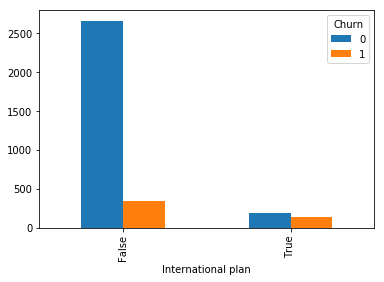

In [98]:
pd.crosstab(telecom['International plan'], telecom['Churn']).plot.bar()

In [95]:
pd.crosstab(telecom['Churn'], telecom['Customer service calls'], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

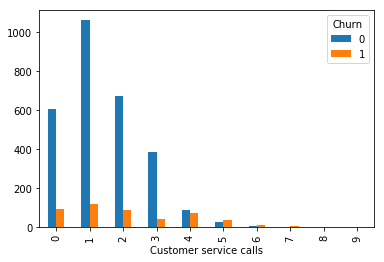

In [101]:
pd.crosstab(telecom['Customer service calls'],telecom['Churn']).plot.bar()

In [102]:
telecom['Many_service_calls'] = (telecom['Customer service calls'] > 3).astype('int')

pd.crosstab(telecom['Many_service_calls'], telecom['Churn'], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

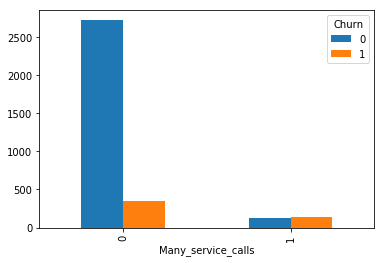

In [103]:
pd.crosstab(telecom['Many_service_calls'], telecom['Churn']).plot.bar()

In [104]:
pd.crosstab(telecom['Many_service_calls'] & telecom['International plan'] , telecom['Churn'])

Churn     0    1
row_0           
False  2841  464
True      9   19

In [124]:
def th(x:int)-> float:
    return (e**x - e**-x) / (e**x + e**-x)

0.999909204262595